In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.decomposition import PCA
df = pd.read_csv('../input/pca123/DOC-20221110-WA0012.csv')
df.head(5)


,A,B,C,STATUS
0,0.65625,0.00000,0.000000,NO
1,0.62500,0.03125,0.019531,YES
2,0.59375,0.06250,0.035156,YES
3,0.56250,0.09375,0.052734,NO
4,0.53125,0.12500,0.054688,YES


In [3]:
from sklearn.preprocessing import StandardScaler

In [68]:
x = df.iloc[:,0:2].values
y = df.iloc[:,3]

In [70]:
y

0      NO
1     YES
2     YES
3      NO
4     YES
     ... 
59    YES
60     NO
61    YES
62    YES
63     NO
Name: STATUS, Length: 64, dtype: object

In [69]:
x

array([[0.65625, 0.     ],
       [0.625  , 0.03125],
       [0.59375, 0.0625 ],
       [0.5625 , 0.09375],
       [0.53125, 0.125  ],
       [0.5    , 0.15625],
       [0.46875, 0.1875 ],
       [0.4375 , 0.21875],
       [0.59375, 0.0625 ],
       [0.5625 , 0.09375],
       [0.53125, 0.125  ],
       [0.5    , 0.15625],
       [0.46875, 0.1875 ],
       [0.4375 , 0.21875],
       [0.40625, 0.25   ],
       [0.375  , 0.28125],
       [0.53125, 0.125  ],
       [0.5    , 0.15625],
       [0.46875, 0.1875 ],
       [0.4375 , 0.21875],
       [0.40625, 0.25   ],
       [0.375  , 0.28125],
       [0.34375, 0.3125 ],
       [0.3125 , 0.34375],
       [0.46875, 0.1875 ],
       [0.4375 , 0.21875],
       [0.40625, 0.25   ],
       [0.375  , 0.28125],
       [0.34375, 0.3125 ],
       [0.3125 , 0.34375],
       [0.28125, 0.375  ],
       [0.25   , 0.40625],
       [0.40625, 0.25   ],
       [0.375  , 0.28125],
       [0.34375, 0.3125 ],
       [0.3125 , 0.34375],
       [0.28125, 0.375  ],
 

In [50]:
model = PCA(n_components = 2)
x = StandardScaler().fit_transform(x)

In [73]:
pca = model.fit_transform(x)
final = pd.DataFrame(data = pca , columns = ['pca1', 'pca2'])
pca

array([[ 4.64038825e-01,  1.85580603e-17],
       [ 4.19844651e-01,  1.28723176e-17],
       [ 3.75650478e-01,  4.86926023e-18],
       [ 3.31456304e-01, -3.13379716e-18],
       [ 2.87262130e-01, -1.11368545e-17],
       [ 2.43067956e-01, -3.35073004e-18],
       [ 1.98873782e-01,  4.43539447e-18],
       [ 1.54679608e-01, -3.56766293e-18],
       [ 3.75650478e-01,  4.86926023e-18],
       [ 3.31456304e-01, -3.13379716e-18],
       [ 2.87262130e-01, -1.11368545e-17],
       [ 2.43067956e-01, -3.35073004e-18],
       [ 1.98873782e-01,  4.43539447e-18],
       [ 1.54679608e-01, -3.56766293e-18],
       [ 1.10485435e-01,  4.21846158e-18],
       [ 6.62912607e-02,  1.62699664e-19],
       [ 2.87262130e-01, -1.11368545e-17],
       [ 2.43067956e-01, -3.35073004e-18],
       [ 1.98873782e-01,  4.43539447e-18],
       [ 1.54679608e-01, -3.56766293e-18],
       [ 1.10485435e-01,  4.21846158e-18],
       [ 6.62912607e-02,  1.62699664e-19],
       [ 2.20970869e-02,  5.42332212e-20],
       [-2.

In [52]:
final2 = pd.concat([final, y],axis = 1)


In [53]:
final2

,pca1,pca2,STATUS
0,2.898275,2.035226e-16,NO
1,2.622249,-7.246623e-17,YES
2,2.346223,-1.023307e-16,YES
3,2.070197,6.503570e-17,NO
4,1.794170,3.517122e-17,YES
...,...,...,...
59,-1.794170,-3.517122e-17,YES
60,-2.070197,-6.503570e-17,NO
61,-2.346223,1.023307e-16,YES
62,-2.622249,7.246623e-17,YES


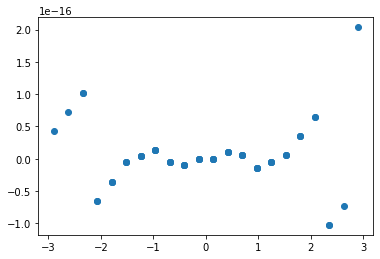

In [55]:
import matplotlib.pyplot as plt
plt.scatter(final2['pca1'], final2['pca2'])



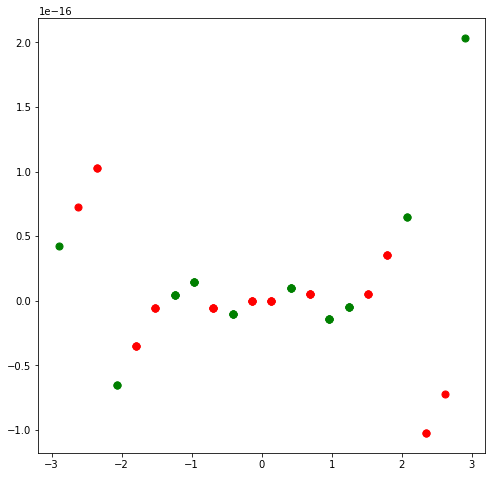

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)

targets = ['YES','NO']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final2['STATUS'] == target
    ax.scatter(final2.loc[indicesToKeep, 'pca1']
               , final2.loc[indicesToKeep, 'pca2']
               , c = color
               , s = 50)